## Spaghetti Plots with Python ##
**Tyler Wixtrom**<br>
*Texas Tech University*<br>

Unidata Users Workshop<br>
*June 25-28, 2018<br>
Boulder, CO*

In this example, we will look at the simplest form of ensemble visualization, spaghetti plots, while using python loops and list comprehension to simplify creating these plots. To get started, we will need to download some data from the following location:
https://drive.google.com/open?id=1NVMoPlt8PbAzW91WT-M6wy3PD206eExR

In [1]:
import numpy as np
from netCDF4 import Dataset, num2date

### Data ###

To get started, we will need to bring in some data. The included sample data is from a 20-member multi-physics ensemble initialized at 12 UTC on 1 February 2015. To start, lets look at what data is available.

In [2]:
data = data = Dataset('../2015020112/wrfprst_d01_2015020112_mem1.nc')
print(list(data.variables))

['pressure_levels', 'valid_time', 'lat', 'lon', 'height', 'tot_pcp', 'timestep_pcp', 'mslp', 'UH', 'cape', 'cin', 'DBZ']


In [3]:
print(data.variables['height'])
print(data.variables['pressure_levels'])
print(data.variables['pressure_levels'][:])

<class 'netCDF4._netCDF4.Variable'>
float32 height(time, pressure_levels, lat, lon)
    units: m
    decription: height [MSL] of isobaric surfaces
unlimited dimensions: time
current shape = (17, 1, 327, 507)
filling on, default _FillValue of 9.969209968386869e+36 used

<class 'netCDF4._netCDF4.Variable'>
float32 pressure_levels(pressure_levels)
    units: Pascal
    description: Isobaric Pressure Levels
unlimited dimensions: 
current shape = (1,)
filling on, default _FillValue of 9.969209968386869e+36 used

[50000.0]


We can see that each file contains several variables, one of which is the geopotential height on the 500 hPa surface. For this example, we will need to open the 500 hPa height fields from each of the forecast members. This will be done with the aid of a loop and a dictionary.

In [4]:
heights = {}
for i in range(1, 21):
    data = Dataset('../2015020112/wrfprst_d01_2015020112_mem'+str(i)+'.nc')
    heights['mem'+str(i)] = data.variables['height'][:].data

Since the grid and time coordinates are the same for all members, we will open the latitude, longitude, and time arrays once and use them as the reference for all members

In [5]:
lat = data.variables['lat'][0, :]
lon = data.variables['lon'][0, :]
vtimes = num2date(data.variables['valid_time'][:], data.variables['valid_time'].units)

### Create the Plots ###
To create the spaghetti plots, we will use the cartopy package (https://scitools.org.uk/cartopy/docs/latest/) for geographic reference, and the Matplotlib package (https://matplotlib.org) for plotting.

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Set up our projection
plotcrs = ccrs.LambertConformal(central_longitude=-100.0, central_latitude=45.0)

# Get data to plot state and province boundaries
states_provinces = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lakes',
    scale='50m',
    facecolor='none')

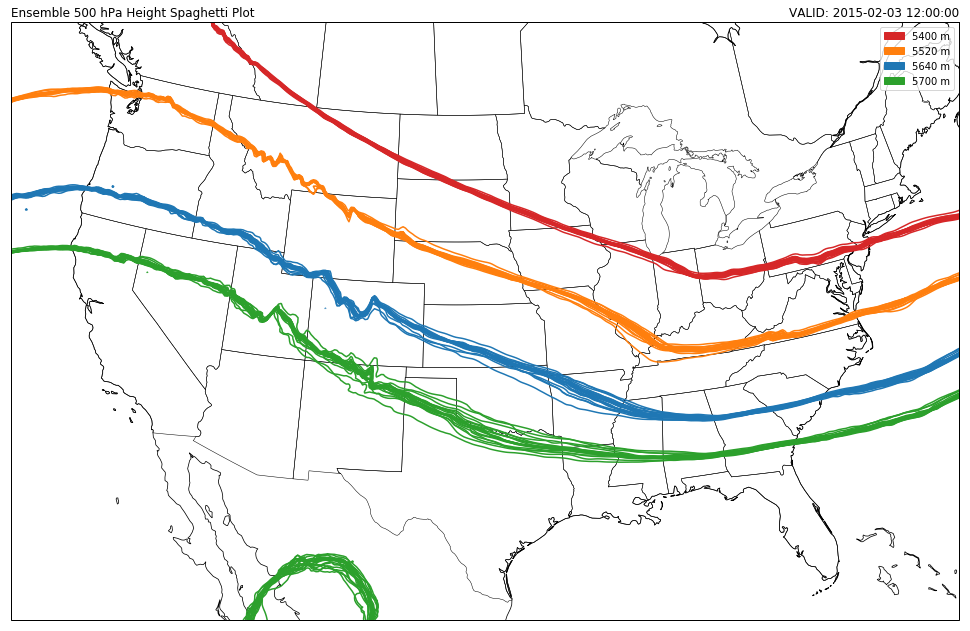

In [7]:
# Choose a time to plot
time = -1

# Set up the figure and add a map background
fig = plt.figure(1, figsize=(17., 12.))
ax = plt.subplot(111, projection=plotcrs)
ax.set_extent((-123, -74, 25, 51), ccrs.PlateCarree())
ax.coastlines('50m', edgecolor='black', linewidth=0.75)
ax.add_feature(states_provinces, edgecolor='black', linewidth=0.5)

# Plot the desired contours for each member
for i in range(1, 21):
    contours = np.array([5400, 5520, 5640, 5700])
    ax.contour(lon, lat, heights['mem'+str(i)][time, 0,], contours, colors=['tab:red', 'tab:orange', 'tab:blue',  'tab:green'],
               transform=ccrs.PlateCarree())

# Add each contour color to the legend
red_patch = mpatches.Patch(color='tab:red', label='5400 m')
orange_patch = mpatches.Patch(color='tab:orange', label='5520 m')
blue_patch = mpatches.Patch(color='tab:blue', label='5640 m')
green_patch = mpatches.Patch(color='tab:green', label='5700 m')
plt.legend(handles=[red_patch, orange_patch, blue_patch, green_patch], loc=1)

# Make some titles
plt.title('Ensemble 500 hPa Height Spaghetti Plot', loc='left')
plt.title('VALID: %s' % (vtimes[time]), loc='right')
plt.show()

### Your Turn! ###

Try making a spaghetti plot of the 992, 1000, and 1008 hPa contours of MSLP.

In [ ]:
mslp = {}
for i in range(1, 21):
    data = Dataset('../2015020112/wrfprst_d01_2015020112_mem'+str(i)+'.nc')
    mslp[] =         ######## Complete This Line #########

In [ ]:
# Choose a time to plot
time = 5

# Set up the figure and add a map background
fig = plt.figure(1, figsize=(17., 12.))
ax = plt.subplot(111, projection=plotcrs)
ax.set_extent((-123, -74, 25, 51), ccrs.PlateCarree())
ax.coastlines('50m', edgecolor='black', linewidth=0.75)
ax.add_feature(states_provinces, edgecolor='black', linewidth=0.5)

# Plot the desired contours for each member
for i in range(1, 21):
    
    # Choose the contours to plot
    contours = np.array([]) ######### Complete This Line #########

    # Fill in the blanks to plot the MSLP for each member
    ax.contour(lon, lat, mslp[][time,], ######## Complete This Line ##########
               contours, 
               colors=['tab:red', 'tab:orange', 'tab:green'],
               transform=ccrs.PlateCarree())

# Add each contour color to the legend
red_patch = mpatches.Patch(color='tab:red', label='1000 hPa')
orange_patch = mpatches.Patch(color='tab:orange', label='1008 hPa')
green_patch = mpatches.Patch(color='tab:green', label='1016 hPa')
plt.legend(handles=[red_patch, orange_patch, green_patch], loc=1)

# Make some titles
plt.title('Ensemble Mean Sea Level Pressure Spaghetti Plot', loc='left')
plt.title('VALID: %s' % (vtimes[time]), loc='right')
plt.show()

### Solution ###

In [2]:
# %load solutions/spaghetti_solution.py